# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset **tanpa label** dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.
   
2. **Ketentuan Dataset**:
   - **Tanpa label**: Dataset tidak boleh memiliki label atau kelas.
   - **Jumlah Baris**: Minimal 1000 baris untuk memastikan dataset cukup besar untuk analisis yang bermakna.
   - **Tipe Data**: Harus mengandung data **kategorikal** dan **numerikal**.
     - *Kategorikal*: Misalnya jenis kelamin, kategori produk.
     - *Numerikal*: Misalnya usia, pendapatan, harga.

3. **Pembatasan**:  
   Dataset yang sudah digunakan dalam latihan clustering (seperti customer segmentation) tidak boleh digunakan.

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [58]:
import numpy as np
import pandas as pd  
import matplotlib.pyplot as plt  
import seaborn as sns
from yellowbrick.cluster import KElbowVisualizer  
from sklearn.cluster import KMeans, DBSCAN  
from sklearn.metrics import silhouette_score  
import sys, warnings
warnings.filterwarnings('ignore')

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

In [59]:
# Membaca dataset pelanggan mall dari URL dan menampilkan 5 baris pertama
df = pd.read_csv('./customer-personality-analysis/marketing_campaign.csv', delimiter='\t' )
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [60]:
# Menampilkan informasi tentang dataset, termasuk jumlah baris, kolom, tipe data, dan jumlah nilai non-null
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

**People**
- **ID**: Pengidentifikasi unik untuk setiap pelanggan.
- **Year_Birth**: Tahun kelahiran pelanggan.
- **Education**: Tingkat pendidikan pelanggan.
- **Marital_Status**: Status perkawinan pelanggan.
- **Income**: Pendapatan tahunan rumah tangga pelanggan.
- **Kidhome**: Jumlah anak (usia di bawah 12 tahun) di rumah tangga pelanggan.
- **Teenhome**: Jumlah remaja (usia 12-18 tahun) di rumah tangga pelanggan.
- **Dt_Customer**: Tanggal pendaftaran pelanggan sebagai anggota perusahaan.
- **Recency**: Jumlah hari sejak pembelian terakhir pelanggan.
- **Complain**: Bernilai 1 jika pelanggan mengajukan keluhan dalam 2 tahun terakhir, dan 0 jika tidak.

**Products**
- **MntWines**: Jumlah yang dibelanjakan untuk wine dalam 2 tahun terakhir.
- **MntFruits**: Jumlah yang dibelanjakan untuk buah-buahan dalam 2 tahun terakhir.
- **MntMeatProducts**: Jumlah yang dibelanjakan untuk produk daging dalam 2 tahun terakhir.
- **MntFishProducts**: Jumlah yang dibelanjakan untuk produk ikan dalam 2 tahun terakhir.
- **MntSweetProducts**: Jumlah yang dibelanjakan untuk produk manis (seperti permen atau cokelat) dalam 2 tahun terakhir.
- **MntGoldProds**: Jumlah yang dibelanjakan untuk produk emas dalam 2 tahun terakhir.

**Promotion**
- **NumDealsPurchases**: Jumlah pembelian yang dilakukan dengan menggunakan diskon.
- **AcceptedCmp1**: Bernilai 1 jika pelanggan menerima tawaran pada kampanye pertama, dan 0 jika tidak.
- **AcceptedCmp2**: Bernilai 1 jika pelanggan menerima tawaran pada kampanye kedua, dan 0 jika tidak.
- **AcceptedCmp3**: Bernilai 1 jika pelanggan menerima tawaran pada kampanye ketiga, dan 0 jika tidak.
- **AcceptedCmp4**: Bernilai 1 jika pelanggan menerima tawaran pada kampanye keempat, dan 0 jika tidak.
- **AcceptedCmp5**: Bernilai 1 jika pelanggan menerima tawaran pada kampanye kelima, dan 0 jika tidak.
- **Response**: Bernilai 1 jika pelanggan menerima tawaran pada kampanye terakhir, dan 0 jika tidak.

**Place**
- **NumWebPurchases**: Jumlah pembelian yang dilakukan melalui situs web perusahaan.
- **NumCatalogPurchases**: Jumlah pembelian yang dilakukan menggunakan katalog.
- **NumStorePurchases**: Jumlah pembelian yang dilakukan langsung di toko.
- **NumWebVisitsMonth**: Jumlah kunjungan ke situs web perusahaan dalam bulan terakhir.

In [61]:
# Menampilkan statistik deskriptif dari dataset untuk kolom numerik
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

## 1. Memahami Struktur Data

**Tinjau jumlah baris dan kolom dalam dataset.**

In [62]:
# Jumlah barus dan kolom dalam dataset
df.shape

(2240, 29)

**Tinjau jenis data di setiap kolom (numerikal atau kategorikal).**

In [72]:
# Memisahkan kolom kategorikal dan numerikal

categorical_features = []
numerical_features = []

for col in df.columns:
    if df[col].dtype == 'object':
        categorical_features.append(col)
    else:
        numerical_features.append(col)

print('Kolom kategorikal:', categorical_features)
print('Jumlah kolom kategorikal:', len(categorical_features))
print('Kolom numerikal:', numerical_features)
print('Jumlah kolom numerikal:', len(numerical_features))

Kolom kategorikal: ['Education', 'Marital_Status', 'Dt_Customer']
Jumlah kolom kategorikal: 3
Kolom numerikal: ['ID', 'Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response']
Jumlah kolom numerikal: 26


## 2. Menangani Data yang Hilang

**Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.**

In [73]:
# Mencari data yang hilang
df.isna().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

Terdapat baris dari kolom Income yang tidak memiliki nilai atau hilang

In [76]:
# Drop atau hapus baris yang tidak memilki nilai
df = df.dropna()

# Cek jumlah nilai yang hilang setelah penghapusan
df.isna().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

## 3. Analisis Distribusi dan Korelasi  

**Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.**

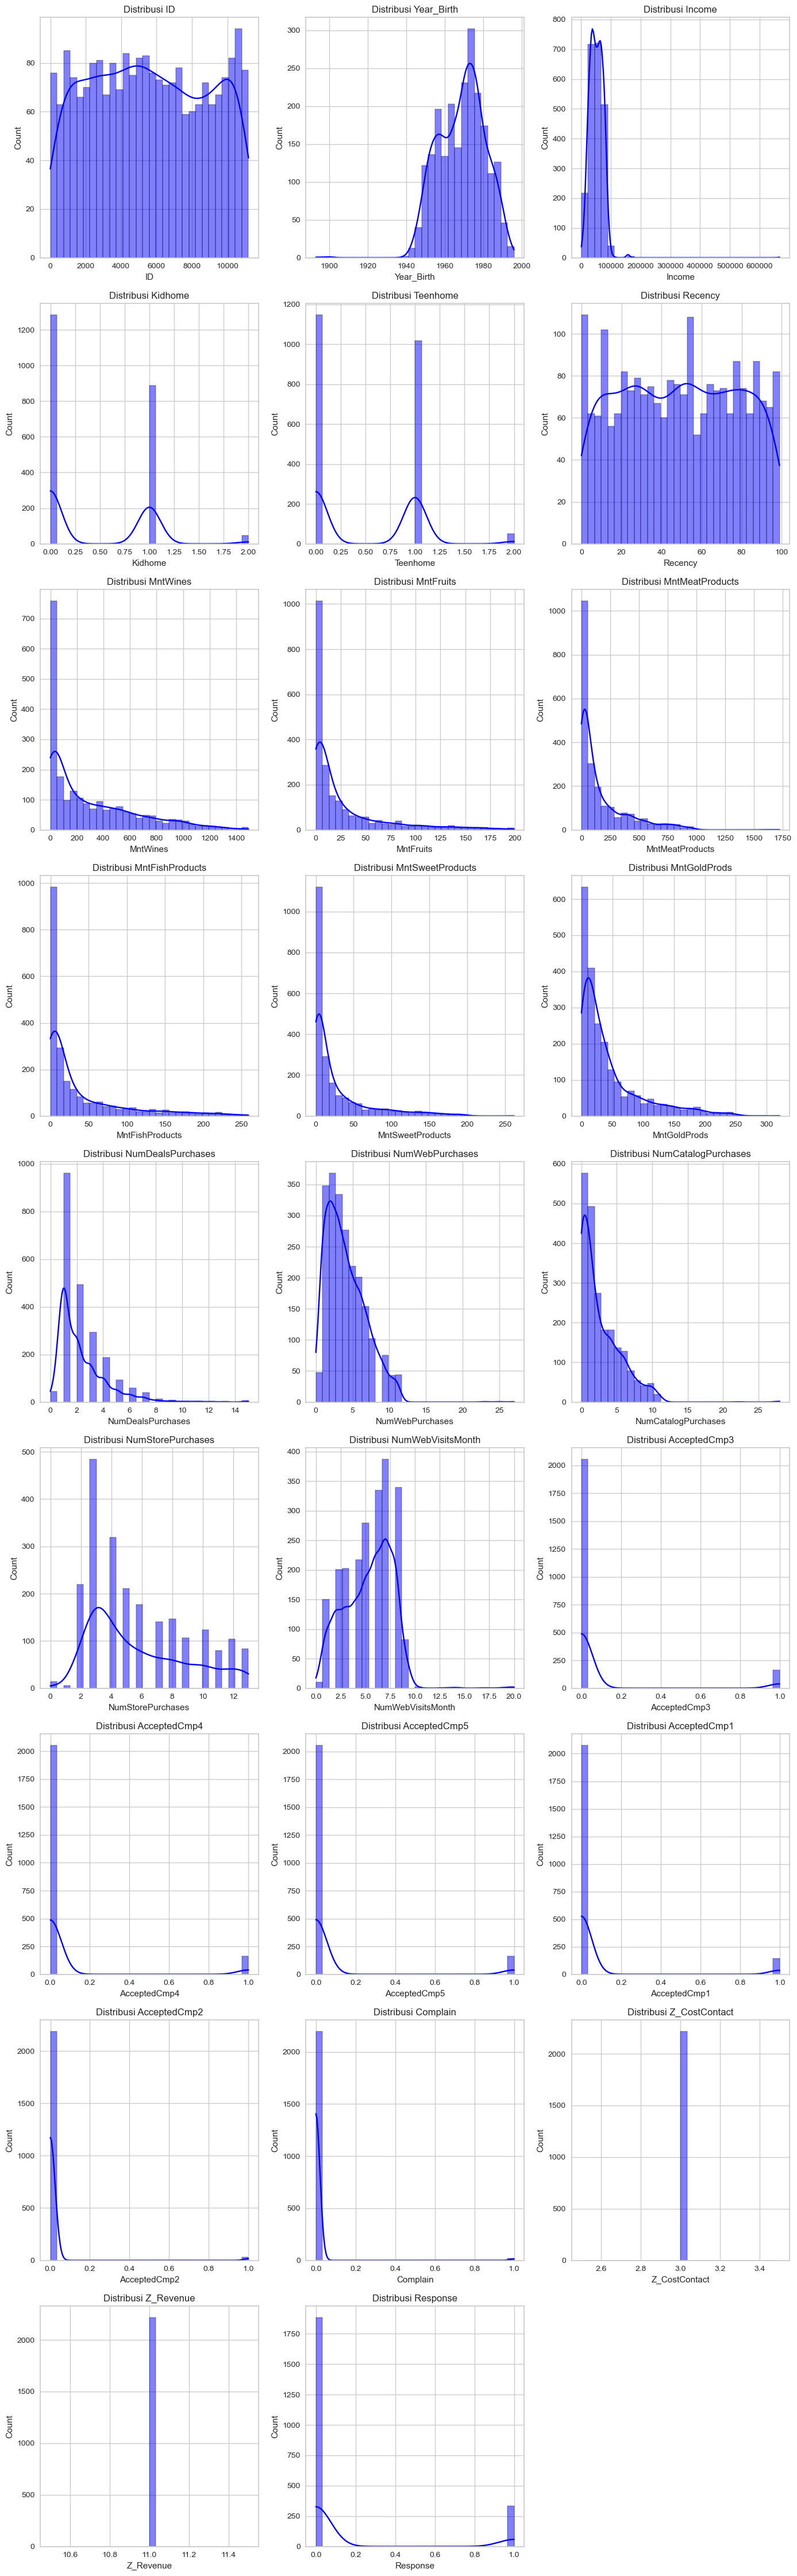

In [85]:
# Ambil kolom numerik
num_features = df.select_dtypes(include=[np.number])

# Hitung jumlah kolom numerik
n_features = len(num_features.columns)

# Tentukan grid subplot (baris dan kolom) secara dinamis
cols = 3  # Jumlah kolom subplot per baris
rows = (n_features + cols - 1) // cols  # Hitung jumlah baris

# Sesuaikan ukuran figure berdasarkan jumlah subplot
plt.figure(figsize=(14, 5 * rows))  # Tinggi diatur berdasarkan jumlah baris

# Buat histogram untuk setiap kolom numerik
for i, column in enumerate(num_features.columns, 1):
    plt.subplot(rows, cols, i)  # Gunakan `rows` dan `cols` yang dinamis
    sns.histplot(num_features[column], bins=30, kde=True, color='blue')
    plt.title(f'Distribusi {column}')

plt.tight_layout()
plt.show()

## P

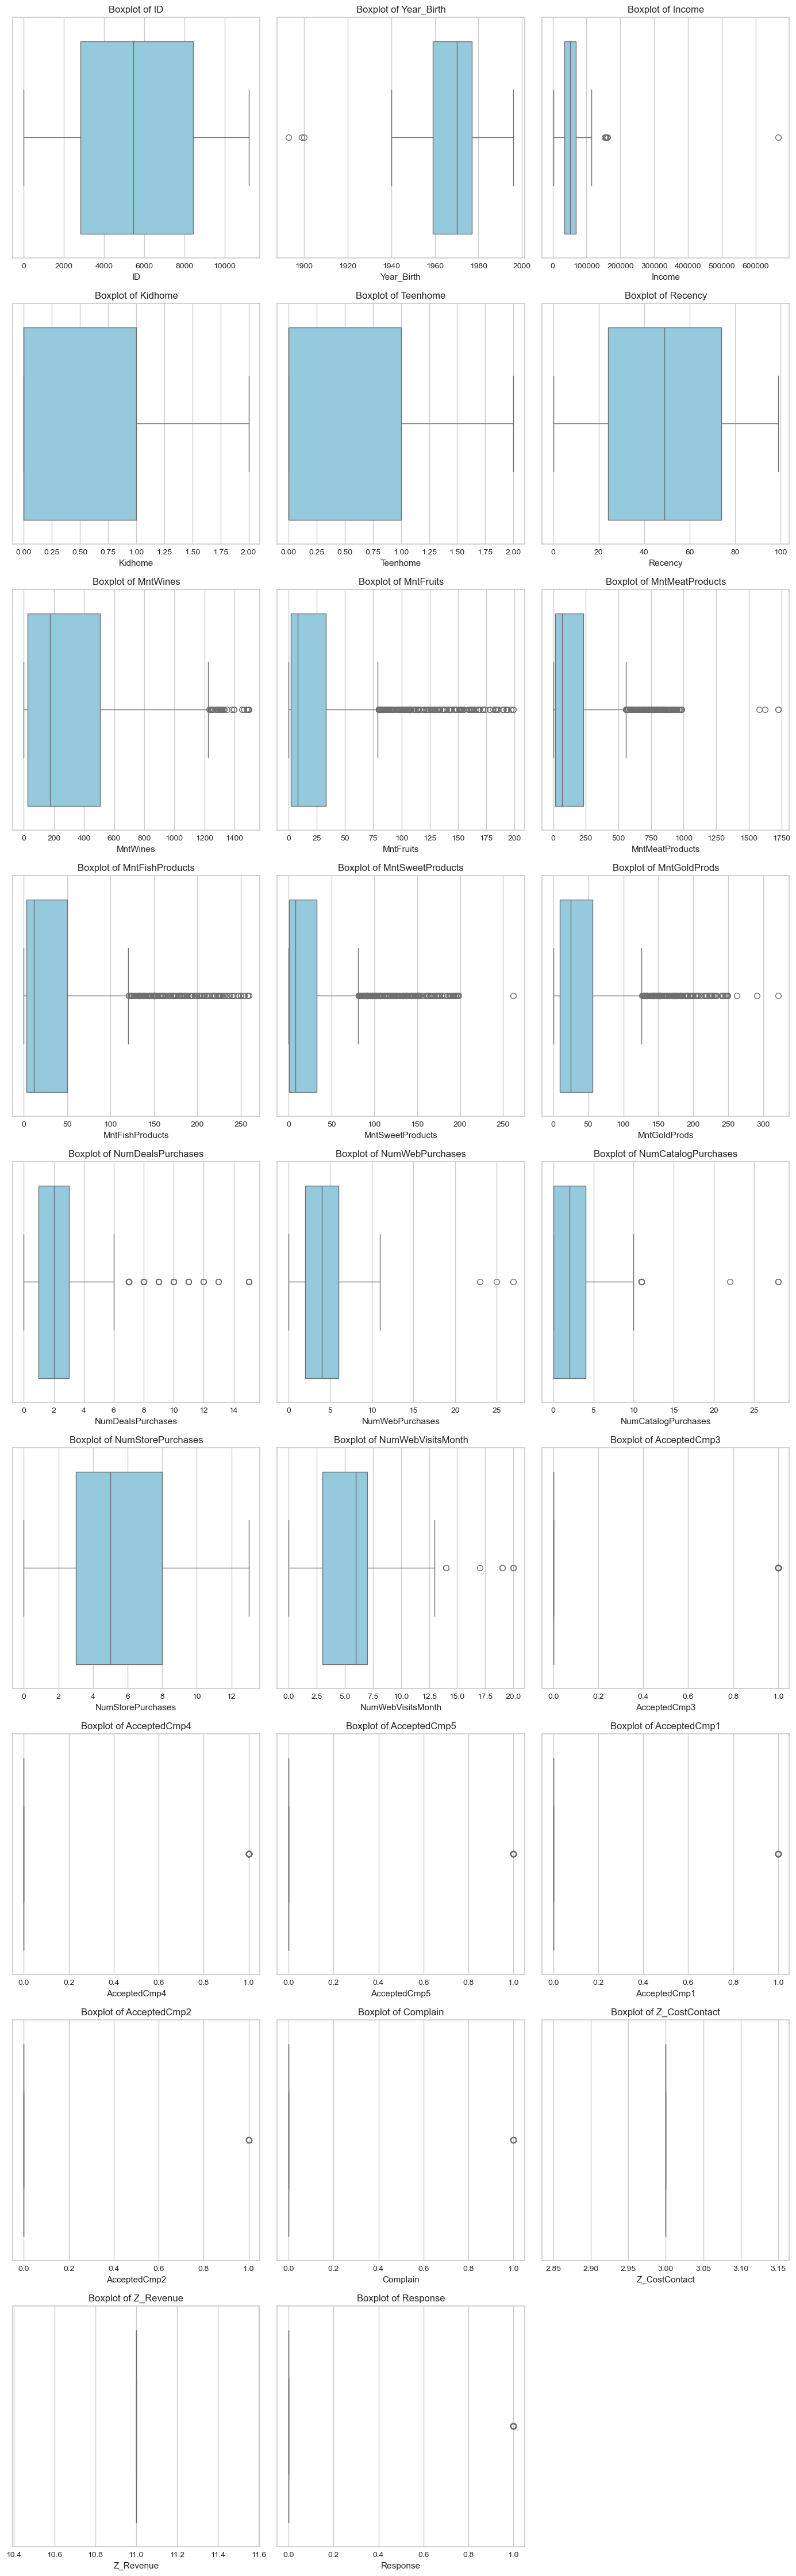

In [86]:
# Ambil kolom numerik dari DataFrame
num_features = df.select_dtypes(include='number')

# Tentukan grid subplot secara dinamis
n_features = len(num_features.columns)
cols = 3  # Jumlah kolom subplot per baris
rows = (n_features + cols - 1) // cols  # Hitung jumlah baris

# Atur ukuran gambar
plt.figure(figsize=(14, 5 * rows))

# Buat boxplot untuk setiap kolom numerik
for i, column in enumerate(num_features.columns, 1):
    plt.subplot(rows, cols, i)
    sns.boxplot(x=num_features[column], color='skyblue')  # Boxplot horizontal
    plt.title(f'Boxplot of {column}')
    plt.xlabel(column)

plt.tight_layout()
plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah.

In [63]:
#Type your code here

# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah **rekomendasi** tahapannya.
1. Pilih algoritma clustering yang sesuai.
2. Latih model dengan data menggunakan algoritma tersebut.

In [64]:
#Type your code here

## **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

In [65]:
#Type your code here

## **c. Feature Selection (Opsional)**

Silakan lakukan feature selection jika Anda membutuhkan optimasi model clustering. Jika Anda menerapkan proses ini, silakan lakukan pemodelan dan evaluasi kembali menggunakan kolom-kolom hasil feature selection. Terakhir, bandingkan hasil performa model sebelum dan sesudah menerapkan feature selection.

In [66]:
#Type your code here

## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

In [67]:
#Type your code here

## **e. Analisis dan Interpretasi Hasil Cluster**

Setelah melakukan clustering, langkah selanjutnya adalah menganalisis karakteristik dari masing-masing cluster berdasarkan fitur yang tersedia.

Berikut adalah **rekomendasi** tahapannya.
1. Analisis karakteristik tiap cluster berdasarkan fitur yang tersedia (misalnya, distribusi nilai dalam cluster).
2. Berikan interpretasi: Apakah hasil clustering sesuai dengan ekspektasi dan logika bisnis? Apakah ada pola tertentu yang bisa dimanfaatkan?

In [68]:
#Type your code here

Tulis hasil interpretasinya di sini.
1. Cluster 1:
2. Cluster 2:
3. Cluster 3:

# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.